<a href="https://colab.research.google.com/github/akshaya-02ly/akshaya2260-nlp/blob/main/b_10_2260_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import TfidfVectorizer



In [ ]:
nltk.download('movie_reviews')
nltk.download('stopwords')

# Separate positive and negative reviews
positive_reviews = [
    " ".join(movie_reviews.words(fileid))
    for fileid in movie_reviews.fileids('pos')
]

negative_reviews = [
    " ".join(movie_reviews.words(fileid))
    for fileid in movie_reviews.fileids('neg')
]


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    lowercase=True,
    max_features=5000
)

# TF-IDF for positive reviews
tfidf_pos = vectorizer.fit_transform(positive_reviews)
pos_terms = vectorizer.get_feature_names_out()
pos_scores = np.mean(tfidf_pos.toarray(), axis=0)

# TF-IDF for negative reviews
tfidf_neg = vectorizer.fit_transform(negative_reviews)
neg_terms = vectorizer.get_feature_names_out()
neg_scores = np.mean(tfidf_neg.toarray(), axis=0)


In [ ]:
def get_top_terms(terms, scores, n=15):
    term_scores = sorted(
        zip(terms, scores),
        key=lambda x: x[1],
        reverse=True
    )
    return term_scores[:n]

top_pos = get_top_terms(pos_terms, pos_scores)
top_neg = get_top_terms(neg_terms, neg_scores)

pos_df = pd.DataFrame(top_pos, columns=["Term", "TF-IDF Score"])
neg_df = pd.DataFrame(top_neg, columns=["Term", "TF-IDF Score"])


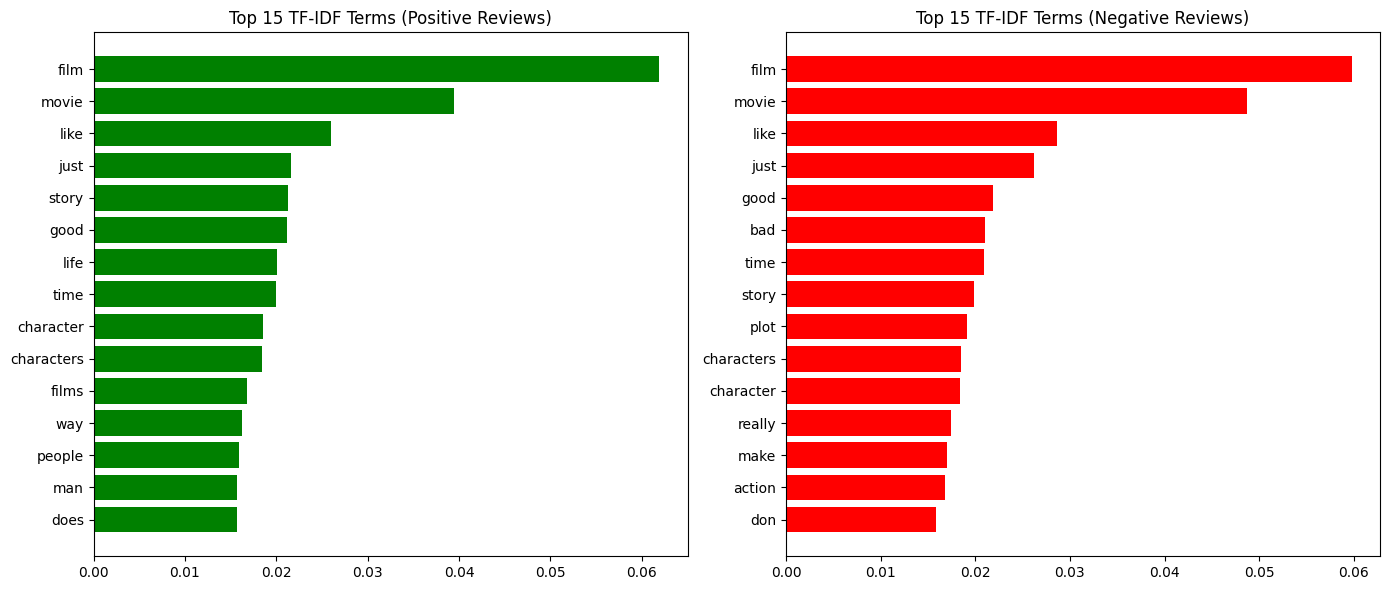

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Positive Reviews
axes[0].barh(pos_df["Term"], pos_df["TF-IDF Score"], color="green")
axes[0].set_title("Top 15 TF-IDF Terms (Positive Reviews)")
axes[0].invert_yaxis()

# Negative Reviews
axes[1].barh(neg_df["Term"], neg_df["TF-IDF Score"], color="red")
axes[1].set_title("Top 15 TF-IDF Terms (Negative Reviews)")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()
